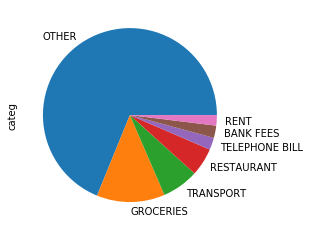

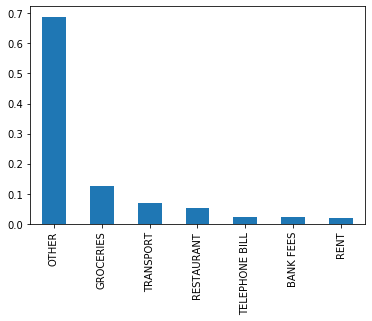

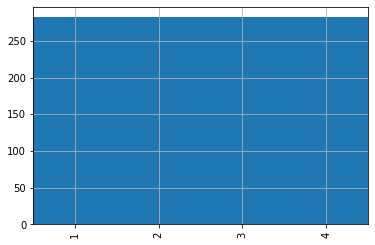

In [14]:
from matplotlib import pyplot as plot 
import pandas as pd 
data=pd.read_csv('operations.csv',parse_dates=[0])
data['categ'].value_counts(normalize=True).plot(kind="pie")
plot.show()
data['categ'].value_counts(normalize=True).plot(kind="bar")
plot.show()
data['quart_month'].value_counts().plot(kind='bar')
data['amount'].hist()
plot.show()

In [25]:
#representation variablea l'aide d'un tableau
occurences=data['categ'].value_counts()
categories=occurences.index
tab=pd.DataFrame(categories,columns=['quart_month'])
tab['n']=occurences.values
tab['f']=tab['n']/len(data)
print(tab)

      quart_month    n         f
0           OTHER  212  0.688312
1       GROCERIES   39  0.126623
2       TRANSPORT   21  0.068182
3      RESTAURANT   16  0.051948
4  TELEPHONE BILL    7  0.022727
5       BANK FEES    7  0.022727
6            RENT    6  0.019481


mean 23.43320754716981
medium -8.31
mode 0   -1.6
dtype: float64
var:
 40401.82999254183
ect:
 201.00206464746034


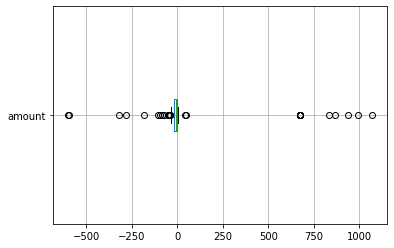

mean -52.99714285714286
medium -53.1
mode 0   -73.0
dtype: float64
var:
 2205.016868027212
ect:
 46.95760713694014


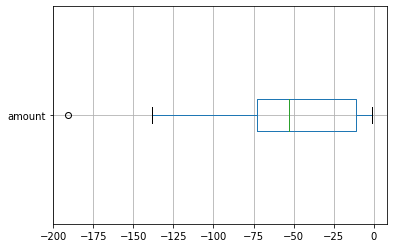

mean -12.045714285714283
medium -7.02
mode 0   -7.02
1   -6.38
dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317


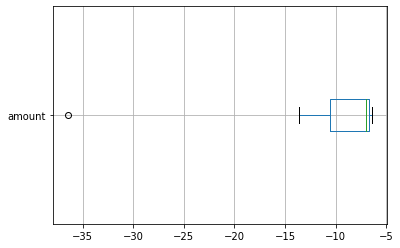

mean -16.341282051282054
medium -12.24
mode 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
dtype: float64
var:
 177.0253547666009
ect:
 13.3050875520081


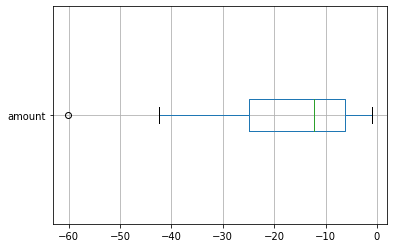

mean -1.8857142857142857
medium -1.92
mode 0   -1.92
dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141


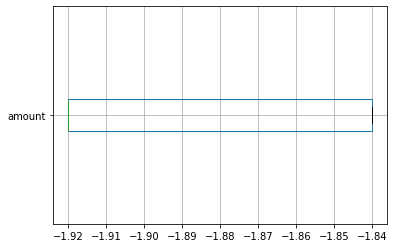

mean -10.3325
medium -10.1
mode 0   -9.2
dtype: float64
var:
 2.8531937500000004
ect:
 1.689139943876765


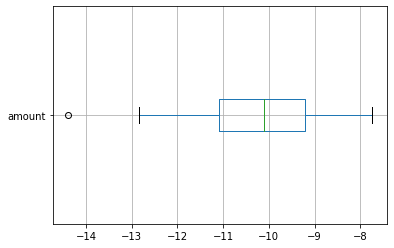

mean -345.0
medium -345.0
mode 0   -345.0
dtype: float64
var:
 0.0
ect:
 0.0


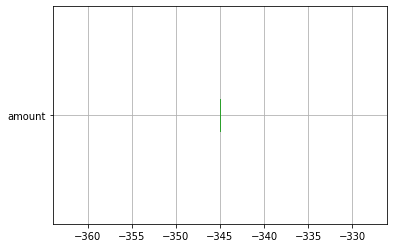

In [4]:
#central tendancies
for cat in data.categ.unique():
    subset=data[data.categ==cat]
    print('mean',subset['amount'].mean())
    print('medium',subset['amount'].median())
    print('mode',subset['amount'].mode())
    #subset['amount'].hist()
    print("var:\n",subset['amount'].var(ddof=0))
    print("ect:\n",subset['amount'].std(ddof=0))
    subset.boxplot(column="amount", vert=False)
    plot.show()

292
292


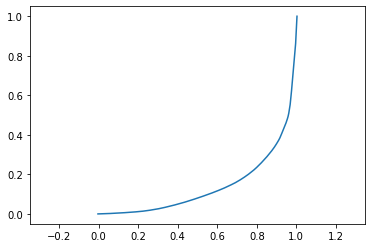

72.04386813739185


In [10]:
import numpy as np
#lorents curve
expenses=data[data['amount']<0]
exp=-expenses['amount'].values
n=len(exp)
lorentz=np.cumsum(np.sort(exp))/exp.sum()
#print(lorentz)
ar=np.array([[1,3,4],[2,4,5],[2,4,5]])
lorentz=np.insert(lorentz,0,[0])
plot.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
print(len(xaxis))
print(len(lorentz))
# here is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
plot.plot(xaxis,lorentz)
plot.show()
AUC = (lorentz.sum() -lorentz[-1]/2 -lorentz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
print(gini*100)